This Notebook performs the EDA (i.e. Exploratory Data Analysis) on the Student Performance dataset.
The goal is to understand the structure, quality, & characteristics of the data before building ML models.

In [15]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Loading the Dataset. We start by loading the dataset and inspecting its basic structure, including the first few rows, shape, and column names.
df = pd.read_csv("../data/raw/student-mat.csv", sep=";")

In [17]:
## Basic Data Inspection, we inspect:
# 1. The first few initial rows of the dataset
# 2. The number of rows & columns
# 3. Column names & data types
# 4. Whether there are missing values.

print(df.head())
print("Shape:" , df.shape)
print("Columns: ", df.columns.tolist())
print(df.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Shape: (395, 33)
Columns:  ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Me

In [18]:
# Interpretation (Observations):
# 1. The dataset contains 395 students and 33 features.
# 2. There are no missing values in the dataset.
# 3. The dataset contains both numerical and categorical variables.
# 4. This means preprocessing steps such as encoding and scaling will be required.
# 5. The dataset is small, so care must be taken to avoid overfitting.

df.describe()
df['G3'].value_counts().sort_index()

G3
0     38
4      1
5      7
6     15
7      9
8     32
9     28
10    56
11    47
12    31
13    31
14    27
15    33
16    16
17     6
18    12
19     5
20     1
Name: count, dtype: int64

In [19]:
# Defining the Target Variable
# We define a student as **at risk** if:
# - `G3 < 10` → At-risk (1)
# - `G3 >= 10` → Not at-risk (0)
# NOTE: This also helps us to convert the problem to "Binary Classification" problem.

# Crete a new binary target column: 1 = at_risk , 0 = at_no_risk
df['at_risk'] = (df['G3'] < 10 ).astype(int)

#checking the class distribution
df['at_risk'].value_counts()

at_risk
0    265
1    130
Name: count, dtype: int64

In [20]:
# Interpretation from the cell before:

# 1. 130 Students are at Risk (This means approx. 33% of the students are at risk.)
# 2. 265 Students are NOT at Risk.
# The dataset is therefore ***moderately imbalanced***, but not skewed.

### Implications for Model Design

# - Because the classes are not perfectly balanced, accuracy alone will not be a sufficient evaluation metric.
# - We should also pay special attention to:
#   - Recall (to avoid missing at-risk students)
#   - F1-score (to balance precision and recall)
#   - ROC-AUC (to evaluate overall ranking performance)

In [21]:
# Analysing how some important features differ between students who are at risk and those who are not at risk. This helps us understand which variables may be useful for prediction.

# Important Features:
# - `absences`: number of school absences
# - `studytime`: weekly study time
# - `failures`: number of past class failures
# - `G1`: first period grade
# - `G2`: second period grade

# # Comparing the mean values of important features for at-risk vs not-at-risk students
features_to_compare = ['absences', 'studytime', 'failures', 'G1', 'G2']
df.groupby('at_risk')[features_to_compare].mean()

,absences,studytime,failures,G1,G2
at_risk,,,,,
0,5.192453,2.079245,0.158491,12.452830,12.622642
1,6.761538,1.946154,0.692308,7.761538,6.823077


From the table above, we can observe differences between the two groups. For example:
- At-risk(1) students tend to have:
- More past failures
- Lower grades in G1 and G2
- Different study time and absence patterns
These differences suggest that these features are likely to be informative for predicting whether a student is at risk.

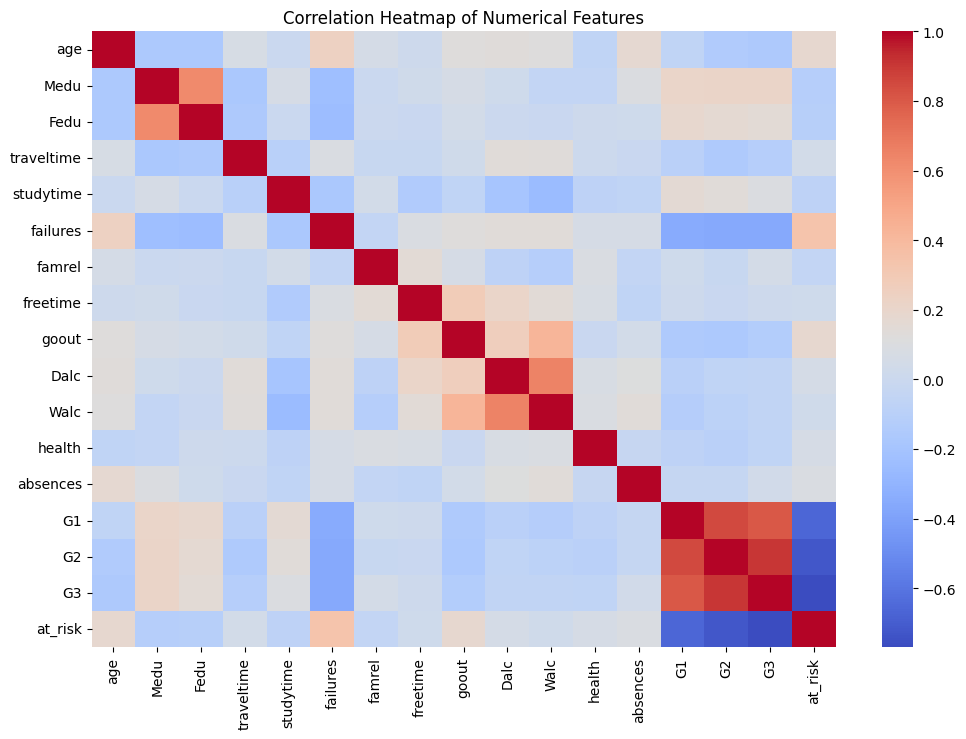

In [23]:
# Correlation Analysis

plt.figure(figsize = (12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

SUMMARY of the EDA:

From this, we can conclude:

- The dataset contains both numerical and categorical features and has no missing values.
- The target variable `at_risk` is moderately imbalanced (~33% at-risk students).
- Several features such as `G1`, `G2`, and `failures` show clear differences between at-risk and not-at-risk students.
- This suggests that the problem is suitable for supervised machine learning.
- Next we need to preprocess the data and prepare it for model training.